### 날씨 데이터  +  지하철 승하차데이터를 이용

대립가설 : 날씨 기온과 지하철 탑승유무간 상관관계가 있다.  
귀무가설 : 날씨 기온과 지하철 탑승유무간 상관관계가 없다.

In [28]:
#날씨 데이터 
#2021년 1월 1일 ~ 2021년 12월 31일까지의 서울지점 데이터 
import pandas as pd
weather=pd.read_csv("weather.csv")
weather.dropna(axis=0,inplace=True)
weather

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2021-01-01,108.0,-4.2,-9.8,1.6
1,2021-01-02,108.0,-5.0,-8.4,-1.4
2,2021-01-03,108.0,-5.6,-9.1,-2.0
3,2021-01-04,108.0,-3.5,-8.4,0.3
4,2021-01-05,108.0,-5.5,-9.9,-2.1
...,...,...,...,...,...
360,2021-12-27,108.0,-7.6,-12.9,-3.9
361,2021-12-28,108.0,-4.1,-8.5,-0.9
362,2021-12-29,108.0,0.4,-3.8,5.9
363,2021-12-30,108.0,-3.9,-6.8,0.2


In [29]:
#날짜와 평균기온의 컬럼만 사용한다.
wdata=weather[['날짜','평균기온(℃)']]
wdata

,날짜,평균기온(℃)
0,2021-01-01,-4.2
1,2021-01-02,-5.0
2,2021-01-03,-5.6
3,2021-01-04,-3.5
4,2021-01-05,-5.5
...,...,...
360,2021-12-27,-7.6
361,2021-12-28,-4.1
362,2021-12-29,0.4
363,2021-12-30,-3.9


In [31]:
#지하철 승하차인원데이터 가져오기
#날짜별로 데이터가 따로 되어있어 1년데이터를 만들기 위해 합쳐줘야 한다.
spring=pd.read_csv("spring.csv")
summer=pd.read_csv("summer.csv")
autumn=pd.read_csv("autumn.csv")
winter=pd.read_csv("winter.csv")
sub=pd.concat([spring,summer,autumn,winter],axis=0)
sub

,연번,날짜,호선,역명,승하차,권종,사용자,4시,5시,6시,...,18시,19시,20시,21시,22시,23시,00시,1시,2시,3시
0,1,2021-01-01,1,서울역,승차,선불카드,일반,0,10,22,...,144,108,94,83,64,16,0,0,0,0
1,2,2021-01-01,1,서울역,하차,선불카드,일반,0,20,57,...,95,89,72,82,27,14,0,0,0,0
2,3,2021-01-01,1,서울역,하차,선불카드,우대권,0,14,62,...,58,45,35,25,6,5,0,0,0,0
3,4,2021-01-01,1,서울역,승차,선불카드,우대권,3,30,32,...,89,63,61,39,23,4,0,0,0,0
4,5,2021-01-01,1,서울역,승차,선불카드,어린이,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653707,653708,2021-12-31,8,남위례,하차,1회용교통카드,일반,0,0,0,...,2,0,2,1,0,0,0,0,0,0
653708,653709,2021-12-31,8,남위례,승차,1회용교통카드,우대권,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653709,653710,2021-12-31,8,남위례,하차,1회용교통카드,우대권,0,0,0,...,2,0,0,0,0,0,0,0,0,0
653710,653711,2021-12-31,8,남위례,하차,1회용교통카드,어린이,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [32]:
#날씨와의 데이터 연관성을 알아보기 위해 1호선,서울역,선불카드,일반사용자로 데이터를 구체화시킨다.
sub2=sub[sub['역명']=='서울역']
sub3=sub2[sub2['호선']==1]
sub4=sub3[sub3['권종']=='선불카드']
sub5=sub4[sub4['사용자']=='일반']
sub5

,연번,날짜,호선,역명,승하차,권종,사용자,4시,5시,6시,...,18시,19시,20시,21시,22시,23시,00시,1시,2시,3시
0,1,2021-01-01,1,서울역,승차,선불카드,일반,0,10,22,...,144,108,94,83,64,16,0,0,0,0
1,2,2021-01-01,1,서울역,하차,선불카드,일반,0,20,57,...,95,89,72,82,27,14,0,0,0,0
6554,6555,2021-01-02,1,서울역,승차,선불카드,일반,3,36,28,...,201,157,145,144,85,19,0,0,0,0
6555,6556,2021-01-02,1,서울역,하차,선불카드,일반,0,12,51,...,126,124,79,77,33,17,0,0,0,0
13172,13173,2021-01-03,1,서울역,승차,선불카드,일반,1,22,22,...,186,228,170,186,136,40,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,632350,2021-12-29,1,서울역,하차,선불카드,일반,0,34,247,...,549,331,233,283,110,41,3,0,0,0
639440,639441,2021-12-30,1,서울역,하차,선불카드,일반,0,28,258,...,583,350,256,292,113,49,5,0,0,0
639441,639442,2021-12-30,1,서울역,승차,선불카드,일반,9,88,106,...,1373,578,494,627,206,69,0,0,0,0
646542,646543,2021-12-31,1,서울역,하차,선불카드,일반,0,43,208,...,652,521,318,262,162,47,1,0,0,0


In [33]:
#승차와 하차 데이터 나누기
ssub=sub5[sub5['승하차']=='승차']
hsub=sub5[sub5['승하차']=='하차']
ssub

,연번,날짜,호선,역명,승하차,권종,사용자,4시,5시,6시,...,18시,19시,20시,21시,22시,23시,00시,1시,2시,3시
0,1,2021-01-01,1,서울역,승차,선불카드,일반,0,10,22,...,144,108,94,83,64,16,0,0,0,0
6554,6555,2021-01-02,1,서울역,승차,선불카드,일반,3,36,28,...,201,157,145,144,85,19,0,0,0,0
13172,13173,2021-01-03,1,서울역,승차,선불카드,일반,1,22,22,...,186,228,170,186,136,40,0,0,0,0
19742,19743,2021-01-04,1,서울역,승차,선불카드,일반,4,79,80,...,1348,597,396,326,102,36,0,0,0,0
26408,26409,2021-01-05,1,서울역,승차,선불카드,일반,6,88,81,...,1337,545,363,346,123,34,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618304,618305,2021-12-27,1,서울역,승차,선불카드,일반,12,78,107,...,1531,670,482,553,166,79,0,0,0,0
625323,625324,2021-12-28,1,서울역,승차,선불카드,일반,7,94,99,...,1495,652,500,607,192,57,0,0,0,0
632348,632349,2021-12-29,1,서울역,승차,선불카드,일반,7,98,112,...,1485,637,527,676,217,50,1,0,0,0
639441,639442,2021-12-30,1,서울역,승차,선불카드,일반,9,88,106,...,1373,578,494,627,206,69,0,0,0,0


In [34]:
#날짜와 시간대만 남기기
s_sub=ssub[['날짜','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시',
           '14시','15시','16시','17시','18시','19시','20시','21시','22시','23시','00시',
           '1시','2시','3시']]
h_sub=hsub[['날짜','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시',
           '14시','15시','16시','17시','18시','19시','20시','21시','22시','23시','00시',
           '1시','2시','3시']]
s_sub

,날짜,4시,5시,6시,7시,8시,9시,10시,11시,12시,...,18시,19시,20시,21시,22시,23시,00시,1시,2시,3시
0,2021-01-01,0,10,22,32,62,64,96,133,150,...,144,108,94,83,64,16,0,0,0,0
6554,2021-01-02,3,36,28,46,87,83,89,143,158,...,201,157,145,144,85,19,0,0,0,0
13172,2021-01-03,1,22,22,44,79,75,93,173,253,...,186,228,170,186,136,40,0,0,0,0
19742,2021-01-04,4,79,80,299,431,241,146,173,220,...,1348,597,396,326,102,36,0,0,0,0
26408,2021-01-05,6,88,81,253,366,201,137,159,223,...,1337,545,363,346,123,34,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618304,2021-12-27,12,78,107,342,467,293,266,247,318,...,1531,670,482,553,166,79,0,0,0,0
625323,2021-12-28,7,94,99,266,420,324,247,242,330,...,1495,652,500,607,192,57,0,0,0,0
632348,2021-12-29,7,98,112,264,399,292,228,290,331,...,1485,637,527,676,217,50,1,0,0,0
639441,2021-12-30,9,88,106,243,422,257,219,267,285,...,1373,578,494,627,206,69,0,0,0,0


In [35]:
#melt를 사용하여 더 효율적으로 지하철 데이터를 정리하기
#업무일자를 기준으로 하고 var이름을 시간대, value 이름을 승차인원으로 한다.
ssubway=pd.melt(s_sub,id_vars='날짜',var_name='시간대',value_name='승차인원')
hsubway=pd.melt(h_sub,id_vars='날짜',var_name='시간대',value_name='하차인원')
ssubway

,날짜,시간대,승차인원
0,2021-01-01,4시,0
1,2021-01-02,4시,3
2,2021-01-03,4시,1
3,2021-01-04,4시,4
4,2021-01-05,4시,6
...,...,...,...
8755,2021-12-27,3시,0
8756,2021-12-28,3시,0
8757,2021-12-29,3시,0
8758,2021-12-30,3시,0


In [39]:
#날짜 데이터와 지하철 데이터를 합친다.
sdata=pd.merge(wdata,ssubway,on="날짜",how='inner')
hdata=pd.merge(wdata,hsubway,on="날짜",how='inner')
sdata

,날짜,평균기온(℃),시간대,승차인원
0,2021-01-01,-4.2,4시,0
1,2021-01-01,-4.2,5시,10
2,2021-01-01,-4.2,6시,22
3,2021-01-01,-4.2,7시,32
4,2021-01-01,-4.2,8시,62
...,...,...,...,...
8755,2021-12-31,-6.7,23시,60
8756,2021-12-31,-6.7,00시,0
8757,2021-12-31,-6.7,1시,0
8758,2021-12-31,-6.7,2시,0


In [51]:
#시간대나누기
sdata1=sdata[sdata['시간대']=='8시']
sdata2=sdata[sdata['시간대']=='12시']
sdata3=sdata[sdata['시간대']=='18시']
hdata1=hdata[hdata['시간대']=='8시']
hdata2=hdata[hdata['시간대']=='12시']
hdata3=hdata[hdata['시간대']=='18시']
sdata1

,날짜,평균기온(℃),시간대,승차인원
4,2021-01-01,-4.2,8시,62
28,2021-01-02,-5.0,8시,87
52,2021-01-03,-5.6,8시,79
76,2021-01-04,-3.5,8시,431
100,2021-01-05,-5.5,8시,366
...,...,...,...,...
8644,2021-12-27,-7.6,8시,467
8668,2021-12-28,-4.1,8시,420
8692,2021-12-29,0.4,8시,399
8716,2021-12-30,-3.9,8시,422


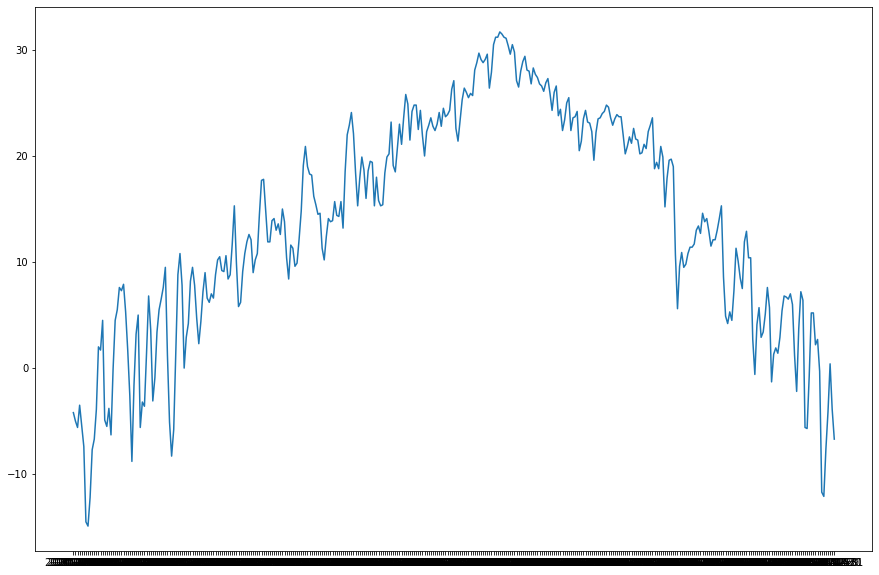

In [54]:
#시각화로 결과 확인하기
#기온과 승하차인원 관계확인하기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(sdata1['날짜'],sdata1['평균기온(℃)'])

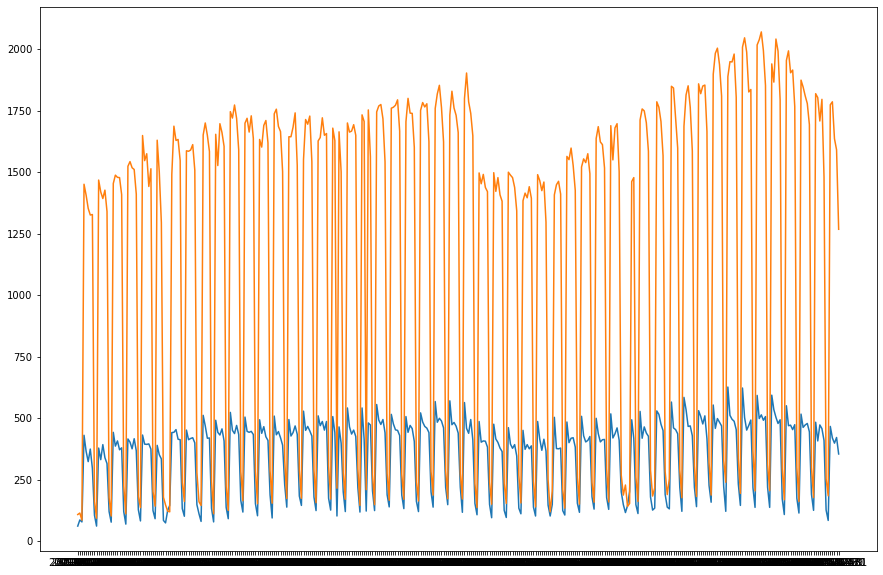

In [56]:
#오전 8시의 승하차인원그래프
plt.figure(figsize=(15,10))
plt.plot(sdata1['날짜'],sdata1['승차인원'])
plt.plot(hdata1['날짜'],hdata1['하차인원'])

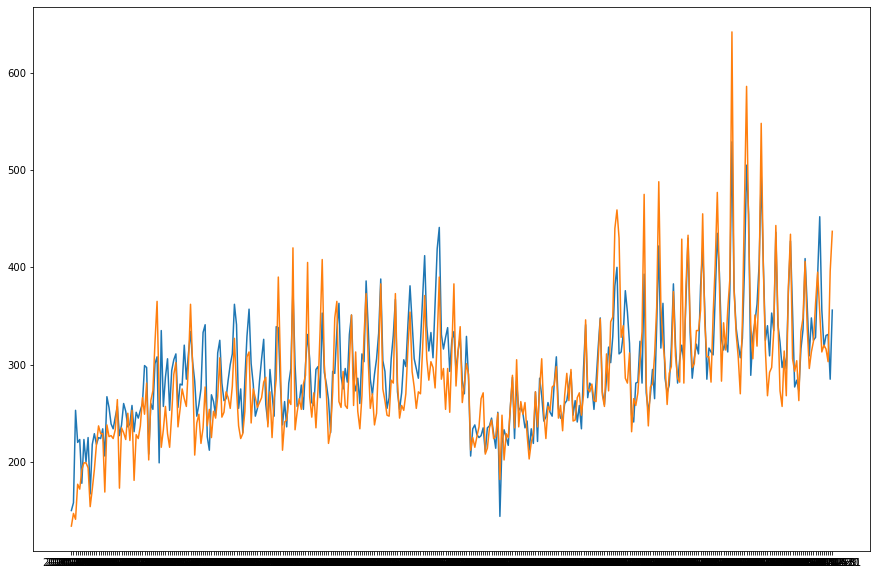

In [58]:
#12시의 승하차인원 그래프
plt.figure(figsize=(15,10))
plt.plot(sdata2['날짜'],sdata2['승차인원'])
plt.plot(hdata2['날짜'],hdata2['하차인원'])

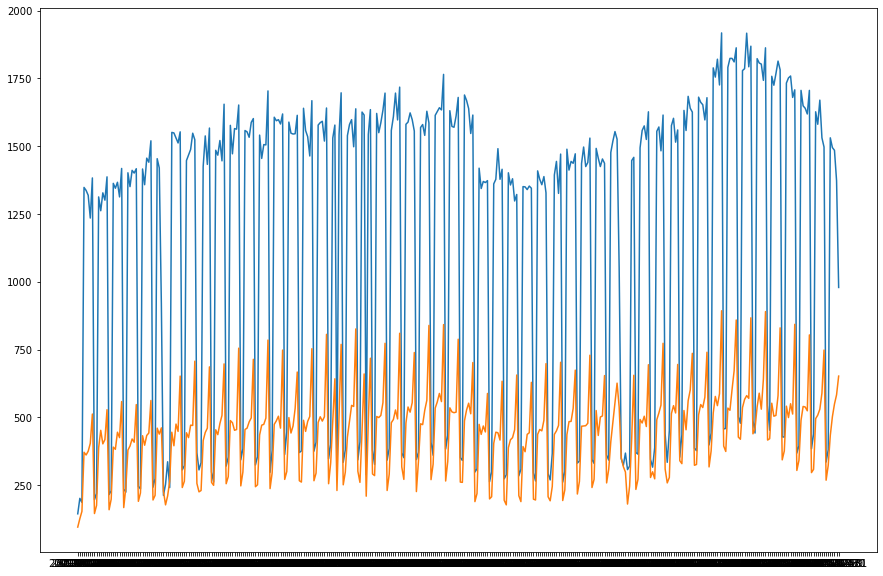

In [59]:
#18시의 승하차인원 그래프
plt.figure(figsize=(15,10))
plt.plot(sdata3['날짜'],sdata3['승차인원'])
plt.plot(hdata3['날짜'],hdata3['하차인원'])

### 가설 분석 결과

* 승하차인원 그래프만 살펴 봤을 때 오전 8시에는 승차인원이 오후 6시에는 하차인원이 많다. 그리고 12시에는 승하차인원이 비슷하다.
* 기온이 높은날(여름)에는 시간대에 관계없이 승하차인원이 적은 것을 볼 수 있다.(감소하는 그래프)
* 기온이 높아질수록 승하차인원이 증가하다 어느정도 수준으로 기온이 높아졌을 때 승하차인원이 푹 감소한다.
* 기온이 낮은날(겨울)에는 승하차인원이 급격하게 감소하는 그래프는 보이지 않으나 평소보다 낮은 수치에 위치해있다.
* 승하차인원이 제일 높았던 날에는 특별히 높거나 낮은 기온이 아니였다.


#### 귀무가설 기각
* 기온의 상승 및 하락에 요인과 함께 승하차인원이 감소함을 확인. 그러나, 승하차인원이 많은 경우에는 날씨가 특별히 영향을 주진 않았다.